# Table of Contents

## 1. Importing Libraries
## 2. Importing Data
## 3. Scrub Personally Identifiable Information (PII)
## 4. Regional Spending Habits
### 4.1 Assigning Regions
### 4.2 Spending Habits By Region
## 5. Low Activity Customers
## 6. Customer Profiling
### 6.1 Create Customer Profiles
### 6.2 Show Customer Profile Distribution
#### 6.2.1 Simple Checks
#### 6.2.2 Visualizing Customer Profile Distributions
##### Brand Loyalty Distribution
##### Price Range Distribution
##### Distribution of Busiest Day
##### Distribution of Busiest Days
##### Distribution of Slowest Days
##### Distribution of Busiest Period of Day
##### Distribution of Spending Groups
##### Distribution of Order Frequency Groups
##### Frequency of Regions
##### Distribution of Age Groups
##### Distribution of Incomes
##### Distribution of Family Status
##### Distribution of Order Timing Week
##### Distribution of Order Timing Day
##### Distribution of Product Preference Groups
##### Create Pet Owner Column
##### Distribution of Pet Owners
## 7. Further Frequency Calculations


# 1. Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# 2. Importing Data


In [4]:
# Import ords_prods_deps_cust.pkl
df_ords_prods_deps_cust = pd.read_pickle(r'/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/02 - Data/Prepared Data/ords_prods_deps_cust.pkl')


# 3. Scrub Personally Identifiable Information (PII)


In [6]:
# particualary sensitive are names, email addresses, physical addresses, and phone numbers

In [7]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)  # Show all columns

# Display the first couple of records for all columns
print("First couple of records for all columns in df_ords_prods_deps_cust:")
print(df_ords_prods_deps_cust.head())

First couple of records for all columns in df_ords_prods_deps_cust:
   user_id  gender     state  age date_joined  num_dependants family_status  \
0    26711  Female  Missouri   48  2017-01-01               3       married   
1    26711  Female  Missouri   48  2017-01-01               3       married   
2    26711  Female  Missouri   48  2017-01-01               3       married   
3    26711  Female  Missouri   48  2017-01-01               3       married   
4    26711  Female  Missouri   48  2017-01-01               3       married   

   income  order_id  order_number  order_weekday  order_hour  \
0  165665    518967             1              2           9   
1  165665    423547             2              2           9   
2  165665   2524893             3              3          11   
3  165665   2524893             3              3          11   
4  165665   2524893             3              3          11   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0 

In [8]:
# The user_id column could be linked to identifiable customer data in the customer dataset

# Anonymizing or pseudonymizing identifiers like "user_id" is a common practice in data privacy frameworks, 
# such as GDPR or CCPA, to ensure no one can trace data back to a specific person.

# By scrubbing or masking the user_id, I can eliminate the risk of accidental exposure or misuse

In [9]:
# Delete the user_id column
df_ords_prods_deps_cust = df_ords_prods_deps_cust.drop(columns=['user_id'])

# Confirm the column is deleted
print("Columns after deleting 'user_id':")
print(df_ords_prods_deps_cust.columns)

Columns after deleting 'user_id':
Index(['gender', 'state', 'age', 'date_joined', 'num_dependants',
       'family_status', 'income', 'order_id', 'order_number', 'order_weekday',
       'order_hour', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', 'final_merge_indicator',
       'price_range', 'busiest_day', 'busiest_days', 'slowest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag'],
      dtype='object')



# 4. Regional Spending Habits



## 4.1 Assigning Regions


In [12]:
# Assigning a region to each record based on the "state" column and 
# the regions key from https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States:

# Region 1 - Northeast: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey
# Region 2 - Midwest: Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
# Region 3 - South: Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana
# Region 4 - West: Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii


In [13]:
# Function to assign regions based on the state
def assign_region(state):
    northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
                 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
    midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 
               'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
    south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
             'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 
             'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
    west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 
            'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
    
    if state in northeast:
        return 'Region 1 - Northeast'
    elif state in midwest:
        return 'Region 2 - Midwest'
    elif state in south:
        return 'Region 3 - South'
    elif state in west:
        return 'Region 4 - West'
    else:
        return 'Unknown Region'

# Apply the function to the 'state' column and create the 'region' column
df_ords_prods_deps_cust['region'] = df_ords_prods_deps_cust['state'].apply(assign_region)

#Frequency in %
price_range_percentages = df_ords_prods_deps_cust['region'].value_counts(normalize=True) * 100
print(price_range_percentages)

# Display the first few rows
print(df_ords_prods_deps_cust[['state', 'region']].head())


region
Region 3 - South        33.303137
Region 4 - West         25.591635
Region 2 - Midwest      23.443794
Region 1 - Northeast    17.661434
Name: proportion, dtype: float64
      state              region
0  Missouri  Region 2 - Midwest
1  Missouri  Region 2 - Midwest
2  Missouri  Region 2 - Midwest
3  Missouri  Region 2 - Midwest
4  Missouri  Region 2 - Midwest


In [14]:
# Display all distinct values in the 'region' column
distinct_regions = df_ords_prods_deps_cust['region'].unique()

print("Distinct values in the 'region' column:")
print(distinct_regions)


Distinct values in the 'region' column:
['Region 2 - Midwest' 'Region 4 - West' 'Region 3 - South'
 'Region 1 - Northeast']



## 4.2 Spending Habits By Region


Crosstab of regions and spending flags:
spending_flag         High spender  Low spender       All
region                                                   
Region 1 - Northeast        108343      5620004   5728347
Region 2 - Midwest          156129      7447681   7603810
Region 3 - South            210182     10591428  10801610
Region 4 - West             160807      8139638   8300445
All                         635461     31798751  32434212


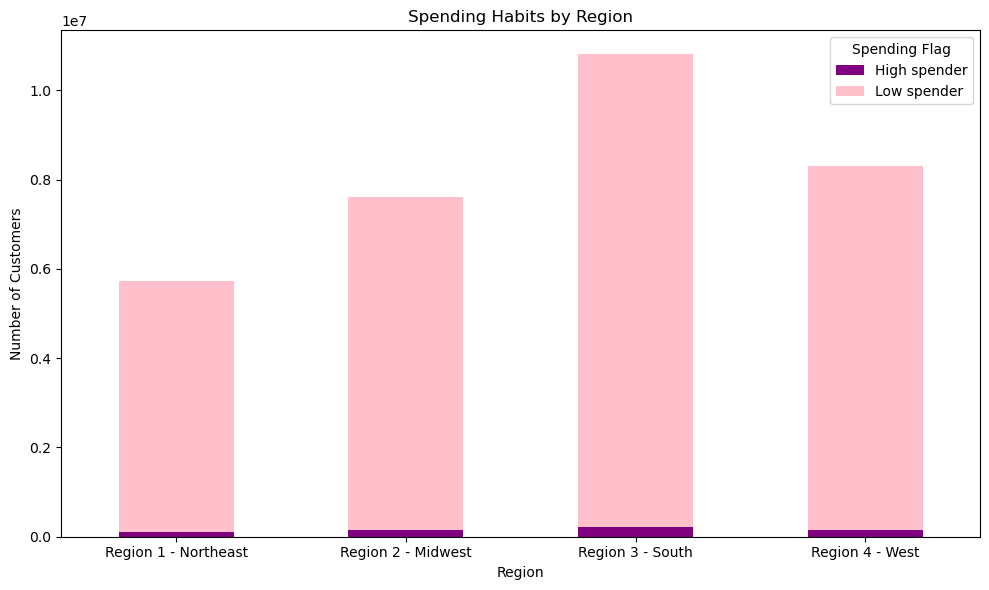

In [16]:
# Crosstab to analyze spending habits by region
region_spending_crosstab = pd.crosstab(df_ords_prods_deps_cust['region'], df_ords_prods_deps_cust['spending_flag'], margins=True)

# Display the crosstab
print("Crosstab of regions and spending flags:")
print(region_spending_crosstab)

# Visualize the difference using a bar chart
region_spending_crosstab.drop(index='All', columns='All').plot(kind='bar', figsize=(10, 6), stacked=True, color = ['purple', 'pink'])
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


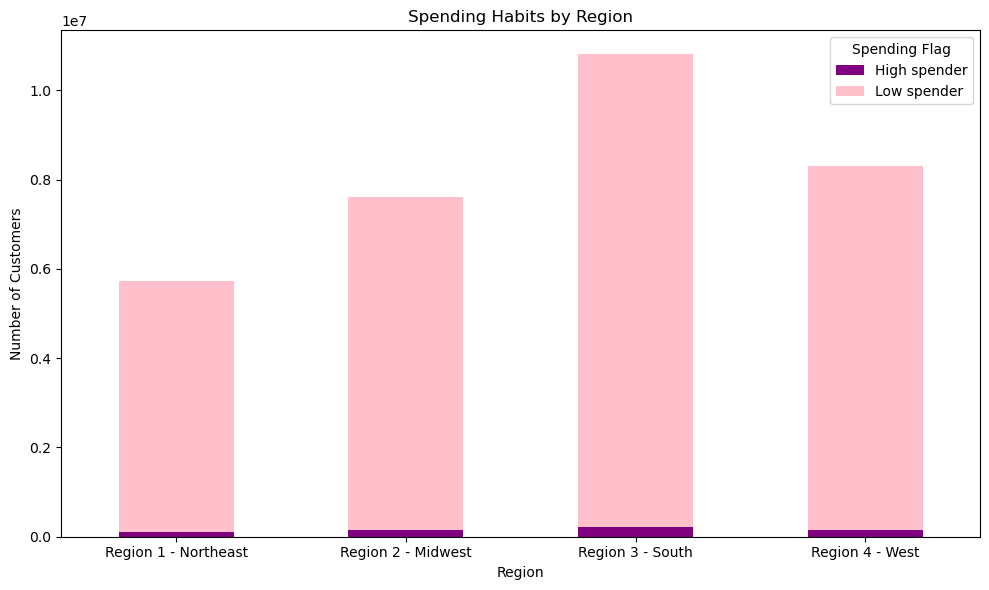

In [17]:
# Save the bar chart
region_spending_crosstab.drop(index='All', columns='All').plot(kind='bar', figsize=(10, 6), color = ['purple', 'pink'], stacked=True)

# Add chart title and labels
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag')
plt.xticks(rotation=0)

# Save the chart as a PNG file
plt.tight_layout()  # Ensures everything fits within the figure area
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/region_spending_habits.png')

In [18]:
# It would be easier to compare with percentages of total, therefore let's add percentages as well

In [20]:
# Displaying the percentages within the stacked bars

Crosstab with percentages of high and low spenders by region:
spending_flag         High spender  Low spender    All
region                                                
Region 1 - Northeast      1.891348    98.108652  100.0
Region 2 - Midwest        2.053300    97.946700  100.0
Region 3 - South          1.945840    98.054160  100.0
Region 4 - West           1.937330    98.062670  100.0
All                       1.959231    98.040769  100.0


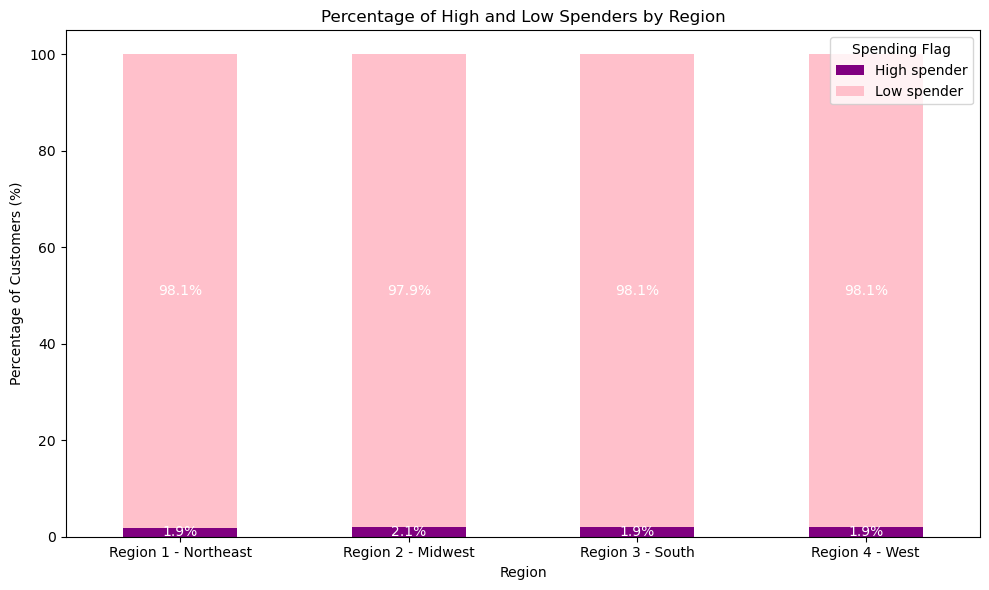

In [21]:
# Crosstab to analyze spending habits by region
region_spending_crosstab = pd.crosstab(df_ords_prods_deps_cust['region'], df_ords_prods_deps_cust['spending_flag'], margins=True)

# Calculate the percentage of high spenders and low spenders for each region
region_spending_percentage = region_spending_crosstab.div(region_spending_crosstab['All'], axis=0) * 100

# Display the crosstab with percentages
print("Crosstab with percentages of high and low spenders by region:")
print(region_spending_percentage)

# Plot the percentages in a stacked bar chart
ax = region_spending_percentage.drop(index='All', columns='All').plot(kind='bar', figsize=(10, 6), color = ['purple', 'pink'], stacked=True)

# Add chart title and labels
plt.title('Percentage of High and Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers (%)')
plt.legend(title='Spending Flag')
plt.xticks(rotation=0)

# Adding percentages on top of the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Display the percentage value on the bar
    percentage = f'{height:.1f}%'
    ax.text(x, y, percentage, ha='center', va='center', fontsize=10, color='white')

# Save the chart as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/region_spending_habits_percent.png')

# Show the chart
plt.show()



### Conclusions


Observation:

In [24]:
# Region 2 - Midwest has a slightly higher percentage (0.2% higher) of high spenders than the other regions

Hypothesis 1:

In [26]:
# If the Midwest has a higher proportion of people in income brackets or age groups that are more likely to spend more, 
# this could result in a slightly higher percentage of high spenders.

Hypothesis 2:

In [28]:
# A lower cost of living in the Midwest could allow people to spend more on certain products compared to those in more expensive regions, 
# skewing the percentage of high spenders.

Hypothesis 3

In [30]:
# Family sizes or more dependents might show different spending behaviors

Hypothesis 4:

In [32]:
# A few outliers could disproportionately affect the percentage of high spenders for the Midwest.


### Recommendations


In [34]:
# While the difference is small, it's still worth investigating if it's consistent across different periods, 
# customer segments, or product categories to see if this pattern holds.

# Additional analysis:
# Comparing demographics across regions (e.g., income, family size).
# Investigating spending behavior by product category to see if the Midwest is spending more on specific types of products.


# 5. Low Activity Customers


In [36]:
# Since 'user_id' is removed, we'll use 'order_id' and count orders by customer 'order_number'
# Assuming the customer is implicitly identifiable by order_number
# Assuming 'order_number' refers to the orders a customer has made
# Group by 'order_number' to count orders for customers
# and assign them an 'activity' flag based on the number of orders.

# Step 1:
# order_count = df_ords_prods_deps_cust.groupby('order_number')['order_id'].nunique()

In [37]:
df_ords_prods_deps_cust.shape

(32434212, 31)

In [38]:
# Step 2: Create a flag for high-activity customers (more than or equal to 5 orders)
df_ords_prods_deps_cust['high_activity_flag'] = df_ords_prods_deps_cust['max_order'] >= 5

In [39]:
# Step 3: Exclude low-activity customers from the data
df_ords_prods_deps_cust_filtered = df_ords_prods_deps_cust[df_ords_prods_deps_cust['high_activity_flag'] == True]

In [40]:
df_ords_prods_deps_cust_filtered.shape

(30992664, 32)

In [41]:
# Step 4: Export the resulting data to a Pkl file
df_ords_prods_deps_cust_filtered.to_pickle('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/02 - Data/Prepared Data/customers_filtered.pkl')


In [42]:
# Optional: Display the first few records of the filtered data
print(df_ords_prods_deps_cust_filtered.head())

   gender     state  age date_joined  num_dependants family_status  income  \
0  Female  Missouri   48  2017-01-01               3       married  165665   
1  Female  Missouri   48  2017-01-01               3       married  165665   
2  Female  Missouri   48  2017-01-01               3       married  165665   
3  Female  Missouri   48  2017-01-01               3       married  165665   
4  Female  Missouri   48  2017-01-01               3       married  165665   

   order_id  order_number  order_weekday  order_hour  days_since_last_order  \
0    518967             1              2           9                      0   
1    423547             2              2           9                     14   
2   2524893             3              3          11                     30   
3   2524893             3              3          11                     30   
4   2524893             3              3          11                     30   

   product_id  add_to_cart_order  reordered             

In [43]:
# Import customers_filtered_.pkl
df_final_data = pd.read_pickle(r'/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/02 - Data/Prepared Data/customers_filtered.pkl')

In [44]:
df_final_data

,gender,state,age,date_joined,num_dependants,family_status,income,order_id,order_number,order_weekday,order_hour,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,department,final_merge_indicator,price_range,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag,region,high_activity_flag
0,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,2,9,0,6184,1,0,Clementines,32,4,4.3,produce,both,Low-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True
1,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,2,9,14,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,dairy eggs,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True
2,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,dairy eggs,both,Mid-range product,Regular day,Regular day,Slowest days,Most orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True
3,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30,6184,2,1,Clementines,32,4,4.3,produce,both,Low-range product,Regular day,Regular day,Slowest days,Most orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True
4,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,3,11,30,47402,3,0,Fuji Apples,24,4,7.1,produce,both,Mid-range product,Regular day,Regular day,Slowest days,Most orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434166,Female,Missouri,66,2020-04-01,2,married,53374,2498530,8,6,21,8,29372,8,1,Prilosec Heart Burn Relief 20 Mg Tablets,70,11,5.1,personal care,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True
32434167,Female,Missouri,66,2020-04-01,2,married,53374,2498530,8,6,21,8,18539,9,0,Moist Supreme Classic Yellow Cake Mix,105,13,9.7,pantry,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True
32434168,Female,Missouri,66,2020-04-01,2,married,53374,2498530,8,6,21,8,47115,10,0,Favorites Super Moist Butter Recipe Yellow Cak...,105,13,8.6,pantry,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True
32434169,Female,Missouri,66,2020-04-01,2,married,53374,2498530,8,6,21,8,32964,11,0,Rich and Creamy Milk Chocolate Frosting,97,13,12.2,pantry,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True



# 6. Customer Profiling


In [46]:
# Creating profiles based on the variables provided (age, income, department_id, num_dependants, order_weekday, and order_hour):

In [47]:
# Display distinct department_id and department names
distinct_departments = df_final_data[['department_id', 'department']].drop_duplicates().sort_values(by='department_id')

# Display the result
print(distinct_departments)

      department_id       department
33                1           frozen
4288              2            other
36                3           bakery
0                 4          produce
216               5          alcohol
98                6    international
8                 7        beverages
150               8             pets
118               9  dry goods pasta
809              10             bulk
58               11    personal care
19               12     meat seafood
42               13           pantry
56               14        breakfast
18               15     canned goods
1                16       dairy eggs
104              17        household
954              18           babies
9                19           snacks
23               20             deli
514              21          missing



## 6.1 Create Customer Profiles


In [49]:
# Function to create customer profiles

# Function to categorize age
def categorize_age(age):
    if age < 25:
        return 'Young Adult'
    elif 25 <= age <= 44:
        return 'Adult'
    elif 45 <= age <= 60:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

# Function to categorize income
def categorize_income(income):
    if income < 40000:
        return 'Low Income'
    elif 40000 <= income <= 100000:
        return 'Middle Income'
    else:
        return 'High Income'

# Function to categorize family status
def categorize_family_status(num_dependants):
    if num_dependants == 0:
        return 'Single Adult'
    elif num_dependants <= 2:
        return 'Small Family'
    else:
        return 'Large Family'

# Function to categorize product preference based on department ID
# def categorize_product_preference(department_id):
#    if department_id == 12:  # Meat, Seafood
#        return 'Non Vegetarian / Vegan'
#    elif department_id == 8:  # Pets
#        return 'Pet Owner'
#    elif department_id == 18:  # Babies
#        return 'Parent'
#    else:
#        return 'General Shopper'

# Function to categorize order timing by week
def categorize_order_timing_week(order_weekday):
    if order_weekday in [0, 1]:  # Saturday, Sunday
        return 'Weekend Shopper'
    elif order_weekday in [2, 3, 4, 5]:  # Monday - Friday
        return 'Weekday Shopper'
    else:
        return 'All Week Shopper'

# Function to categorize order timing by day
def categorize_order_timing_day(order_hour):
    if 5 <= order_hour < 12:
        return 'Morning Shopper'
    elif 12 <= order_hour < 17:
        return 'Day Shopper'
    elif 17 <= order_hour < 21:
        return 'Evening Shopper'
    else:
        return 'Night Shopper'

# Apply functions separately to improve performance
df_final_data['age_group'] = df_final_data['age'].apply(categorize_age)
df_final_data['income_group'] = df_final_data['income'].apply(categorize_income)
df_final_data['family_status'] = df_final_data['num_dependants'].apply(categorize_family_status)
#df_final_data['product_preference'] = df_final_data['department_id'].apply(categorize_product_preference)
df_final_data['order_timing_week'] = df_final_data['order_weekday'].apply(categorize_order_timing_week)
df_final_data['order_timing_day'] = df_final_data['order_hour'].apply(categorize_order_timing_day)

# Display the data frame
df_final_data

,gender,state,age,date_joined,num_dependants,family_status,income,order_id,order_number,order_weekday,order_hour,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,department,final_merge_indicator,price_range,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag,region,high_activity_flag,age_group,income_group,order_timing_week,order_timing_day
0,Female,Missouri,48,2017-01-01,3,Large Family,165665,518967,1,2,9,0,6184,1,0,Clementines,32,4,4.3,produce,both,Low-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper
1,Female,Missouri,48,2017-01-01,3,Large Family,165665,423547,2,2,9,14,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,dairy eggs,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper
2,Female,Missouri,48,2017-01-01,3,Large Family,165665,2524893,3,3,11,30,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,dairy eggs,both,Mid-range product,Regular day,Regular day,Slowest days,Most orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper
3,Female,Missouri,48,2017-01-01,3,Large Family,165665,2524893,3,3,11,30,6184,2,1,Clementines,32,4,4.3,produce,both,Low-range product,Regular day,Regular day,Slowest days,Most orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper
4,Female,Missouri,48,2017-01-01,3,Large Family,165665,2524893,3,3,11,30,47402,3,0,Fuji Apples,24,4,7.1,produce,both,Mid-range product,Regular day,Regular day,Slowest days,Most orders,8,New customer,Low spender,Regular customer,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434166,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,21,8,29372,8,1,Prilosec Heart Burn Relief 20 Mg Tablets,70,11,5.1,personal care,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper
32434167,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,21,8,18539,9,0,Moist Supreme Classic Yellow Cake Mix,105,13,9.7,pantry,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper
32434168,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,21,8,47115,10,0,Favorites Super Moist Butter Recipe Yellow Cak...,105,13,8.6,pantry,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper
32434169,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,21,8,32964,11,0,Rich and Creamy Milk Chocolate Frosting,97,13,12.2,pantry,both,Mid-range product,Regular day,Regular day,Regular day,Average orders,8,New customer,Low spender,Frequent customer,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper


In [ ]:
# Function to determine product preference based on department purchases per order

def categorize_product_preference(department_ids):
    preferences = []  

    if 12 in department_ids:  # Meat, Seafood
        preferences.append('Meat Consumer')
    if 8 in department_ids:   # Pets
        preferences.append('Pet Owner')
    if 18 in department_ids:  # Babies
        preferences.append('Parent')

    # Assign multiple preferences if applicable
    return ' | '.join(preferences) if preferences else 'General Shopper'

# Group by order_id and collect all unique department_ids for each order
df_product_preference = df_final_data.groupby('order_id')['department_id'].agg(set).reset_index()

# Apply function to create the new column
df_product_preference['product_preference'] = df_product_preference['department_id'].apply(categorize_product_preference)

# Drop the department_id column after applying the function
df_product_preference.drop(columns=['department_id'], inplace=True)

# Merge back into the main dataset
df_final_data = df_final_data.merge(df_product_preference, on='order_id', how='left')

# Display frequency distribution
print(df_final_data['product_preference'].value_counts(normalize=True) * 100)

# Ensure 'pet_owner' column is created correctly
df_final_data['pet_owner'] = df_final_data['department_id'].apply(lambda x: 1 if x == 8 else 0)

# Display frequency distribution
print(df_final_data['pet_owner'].value_counts(normalize=True) * 100)

In [204]:
# Export the resulting data to a Pkl file
df_final_data.to_pickle('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/02 - Data/Prepared Data/ords_prods_deps_cust_profile.pkl')



## 6.2 Show Customer Profile Distribution



### 6.2.1 Simple Checks


In [54]:
# Describe the newly created column "customer_profiles"

In [55]:
#Frequency in %
frequency_percentages = df_final_data['age_group'].value_counts(normalize=True) * 100
print(frequency_percentages)

age_group
Senior               32.658093
Adult                31.208518
Middle-Aged Adult    25.103954
Young Adult          11.029436
Name: proportion, dtype: float64


In [70]:
# Young Adults only make 11% of the Instacart customers

In [56]:
#Frequency in %
frequency_percentages = df_final_data['income_group'].value_counts(normalize=True) * 100
print(frequency_percentages)

income_group
Middle Income    48.914501
High Income      45.878741
Low Income        5.206758
Name: proportion, dtype: float64


In [66]:
# People with low income don't seem to shop at Instacart. The Target audience seems to be in the middle and high income group.

In [59]:
#Frequency in %
frequency_percentages = df_final_data['family_status'].value_counts(normalize=True) * 100
print(frequency_percentages)

family_status
Small Family    49.902712
Large Family    25.100946
Single Adult    24.996341
Name: proportion, dtype: float64


In [72]:
# Small families are the largest customer base

In [68]:
#Frequency in %
frequency_percentages = df_final_data['product_preference'].value_counts(normalize=True) * 100
print(frequency_percentages)

product_preference
General Shopper                       66.058400
Meat Consumer                         22.567363
Parent                                 6.114818
Meat Consumer | Parent                 2.781668
Pet Owner                              1.598794
Meat Consumer | Pet Owner              0.685272
Pet Owner | Parent                     0.130450
Meat Consumer | Pet Owner | Parent     0.063234
Name: proportion, dtype: float64


In [76]:
# Under 2 % of customers shop pet food at Instacart, there might be growth potential
# Around 23% of customers consume meat at Instacart, which seems rather low. There might be room for growth

In [61]:
#Frequency in %
frequency_percentages = df_final_data['order_timing_week'].value_counts(normalize=True) * 100
print(frequency_percentages)

order_timing_week
Weekday Shopper     49.582404
Weekend Shopper     36.559800
All Week Shopper    13.857796
Name: proportion, dtype: float64


In [62]:
#Frequency in %
frequency_percentages = df_final_data['order_timing_day'].value_counts(normalize=True) * 100
print(frequency_percentages)

order_timing_day
Day Shopper        40.537858
Morning Shopper    33.963576
Evening Shopper    18.272760
Night Shopper       7.225807
Name: proportion, dtype: float64



### Observation


In [64]:
# Customer profiling can become meaningful at around 1,000–10,000 customers
# Given Instacart’s reliance on large-scale operations and targeted marketing, 
# customer profiling would make significant business sense at around 10,000+ customers. 
# At this scale, patterns in behavior and needs (e.g., regional preferences, dietary needs, income levels) become clearer, 
# and profiling helps with:
# Targeted promotions.
# Optimized inventory.
# Improved customer satisfaction through personalization.
# For a business with 600,000 customers, starting customer profiling earlier (e.g., at 10,000–50,000 customers) 
# ensures that as the company grows, profiles can scale and evolve effectively.

large_profiles.describe()


### 6.2.2 Visualizing Customer Profile Distributions


#### Brand Loyalty Distribution

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/56131420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='loyalty_flag', palette='viridis')


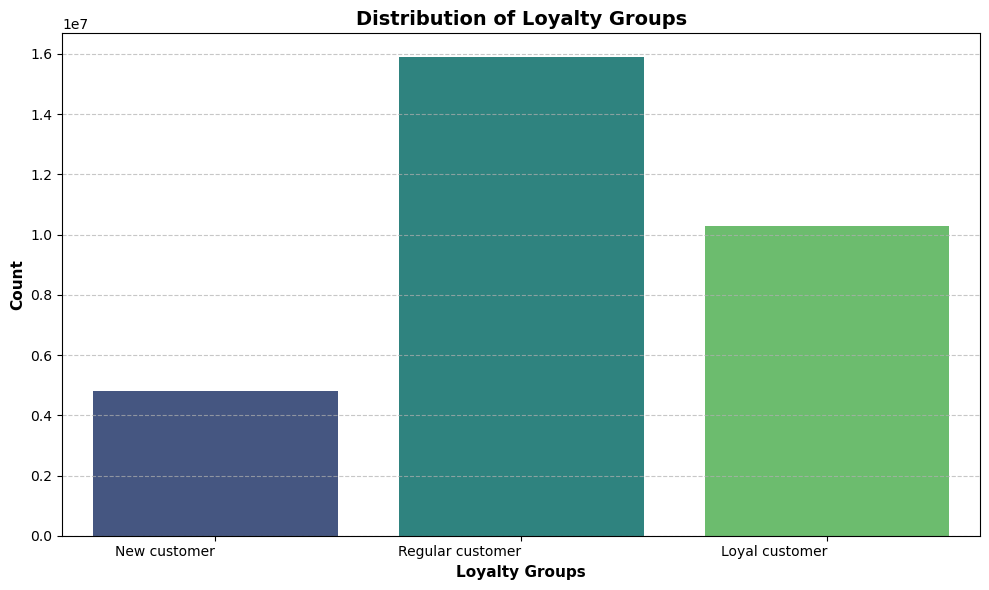

In [157]:
# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='loyalty_flag', palette='viridis')

# Adding titles and labels for clarity
plt.title('Distribution of Loyalty Groups', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Groups', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/loyalty_groups_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Price Range Distribution

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/2662497307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='price_range', palette='viridis')


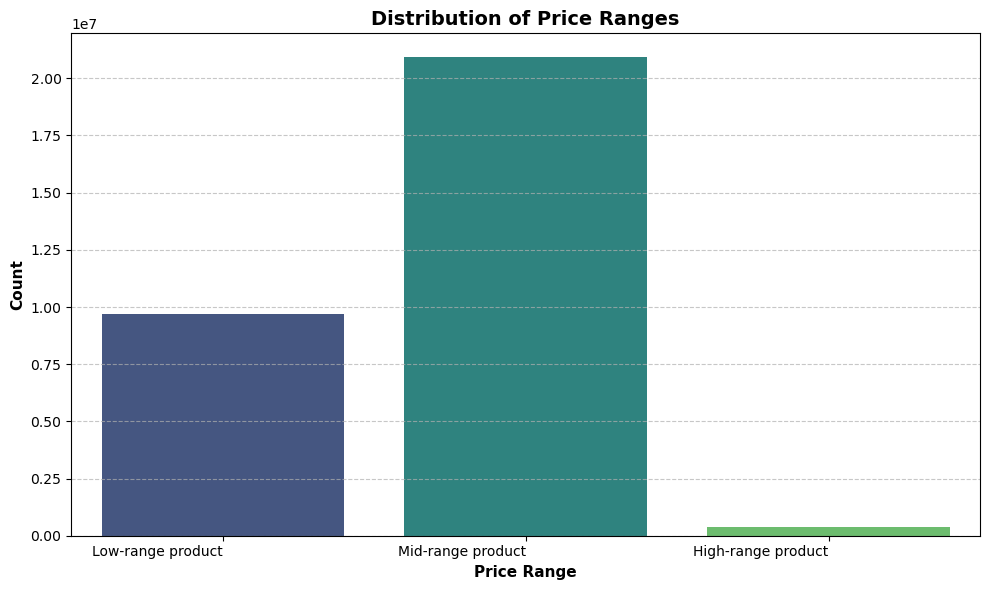

In [106]:
# Define the order for groups
price_range_order = ['Low-range product', 'Mid-range product', 'High-range product']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='price_range', palette='viridis')

# Adding titles and labels for clarity
plt.title('Distribution of Price Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Price Range', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/price_range_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Busiest Day

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/30768312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='busiest_day', palette='viridis', order=busiest_day_order)


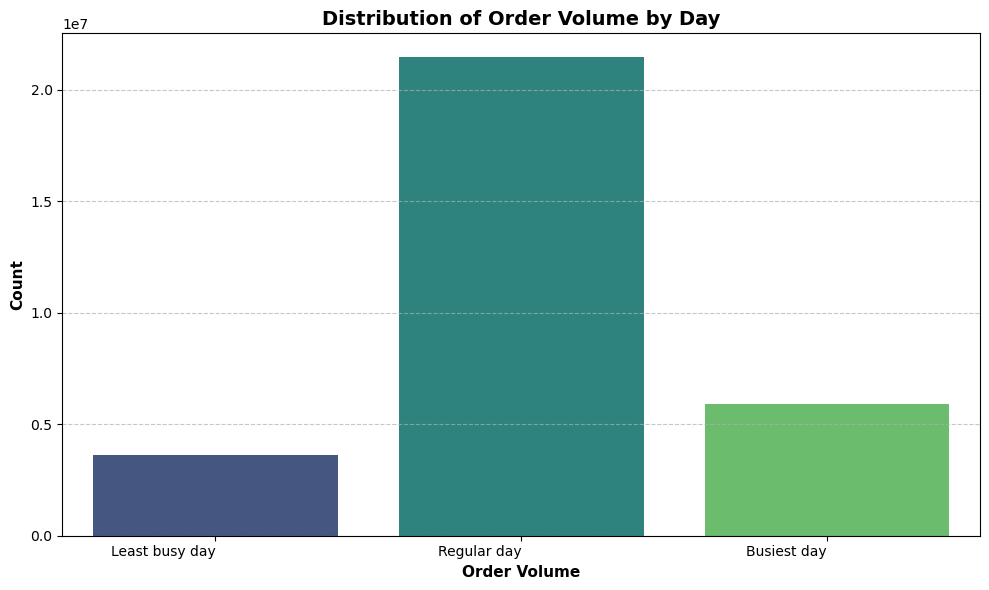

In [132]:
# Define the order for age groups from youngest to oldest
busiest_day_order = ['Least busy day', 'Regular day', 'Busiest day']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='busiest_day', palette='viridis', order=busiest_day_order)

# Adding titles and labels for clarity
plt.title('Distribution of Order Volume by Day', fontsize=14, fontweight='bold')
plt.xlabel('Order Volume', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_volume_by_day_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Busiest Days

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/2258322555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='busiest_days', palette='viridis', order=busiest_day_order)


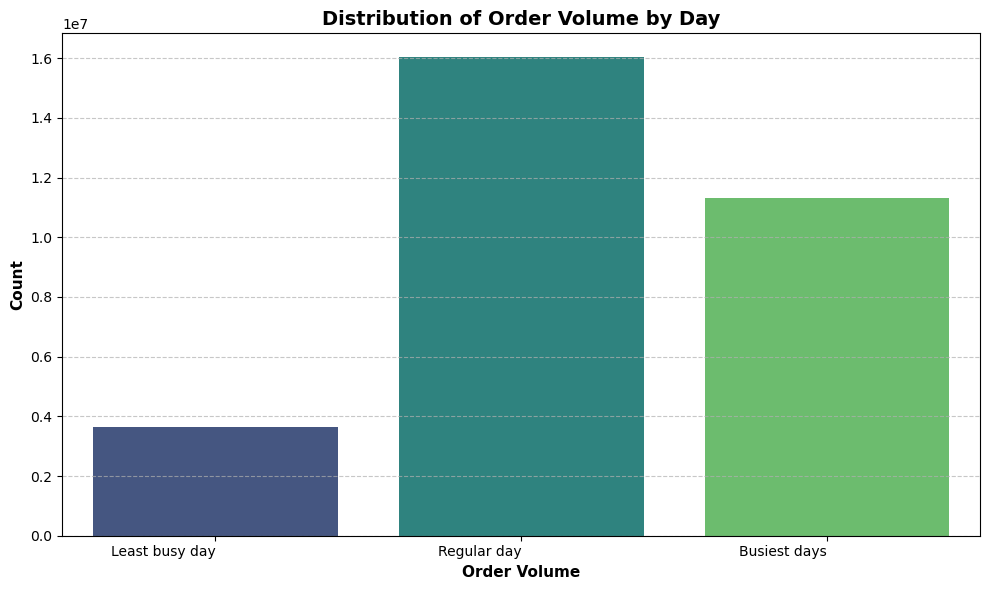

In [134]:
# Define the order for age groups from youngest to oldest
busiest_day_order = ['Least busy day', 'Regular day', 'Busiest days']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='busiest_days', palette='viridis', order=busiest_day_order)

# Adding titles and labels for clarity
plt.title('Distribution of Order Volume by Day', fontsize=14, fontweight='bold')
plt.xlabel('Order Volume', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_volume_by_day_distribution_busiest.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Slowest Days

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/681744687.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='slowest_days', palette='viridis', order=slowest_day_order)


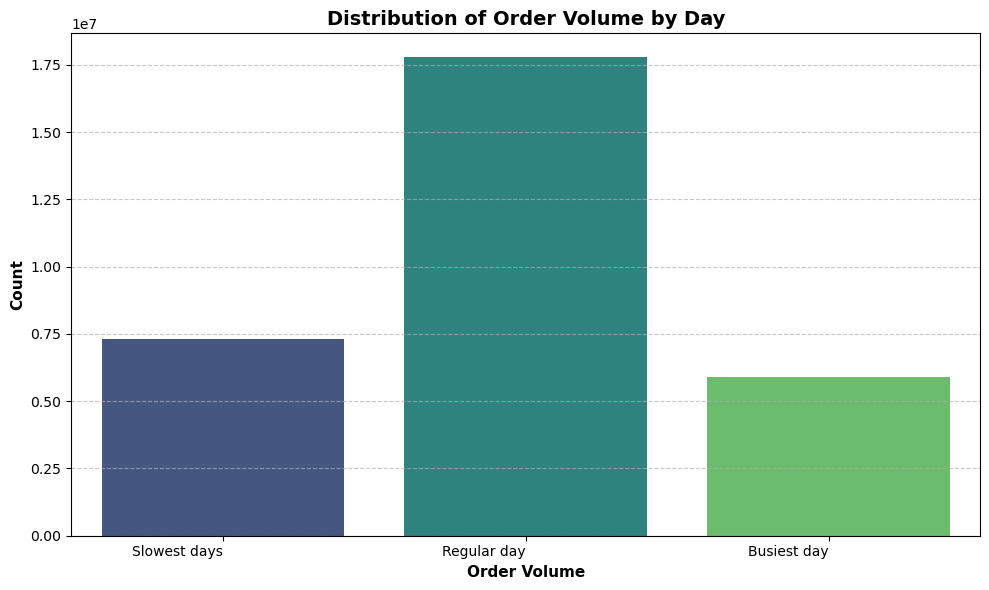

In [148]:
# Define the order for age groups from youngest to oldest
slowest_day_order = ['Slowest days', 'Regular day', 'Busiest day']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='slowest_days', palette='viridis', order=slowest_day_order)

# Adding titles and labels for clarity
plt.title('Distribution of Order Volume by Day', fontsize=14, fontweight='bold')
plt.xlabel('Order Volume', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_volume_by_day_distribution_slowest.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Busiest Period of Day

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/1098244568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='busiest_period_of_day', palette='viridis', order=busiest_period_of_day_order)


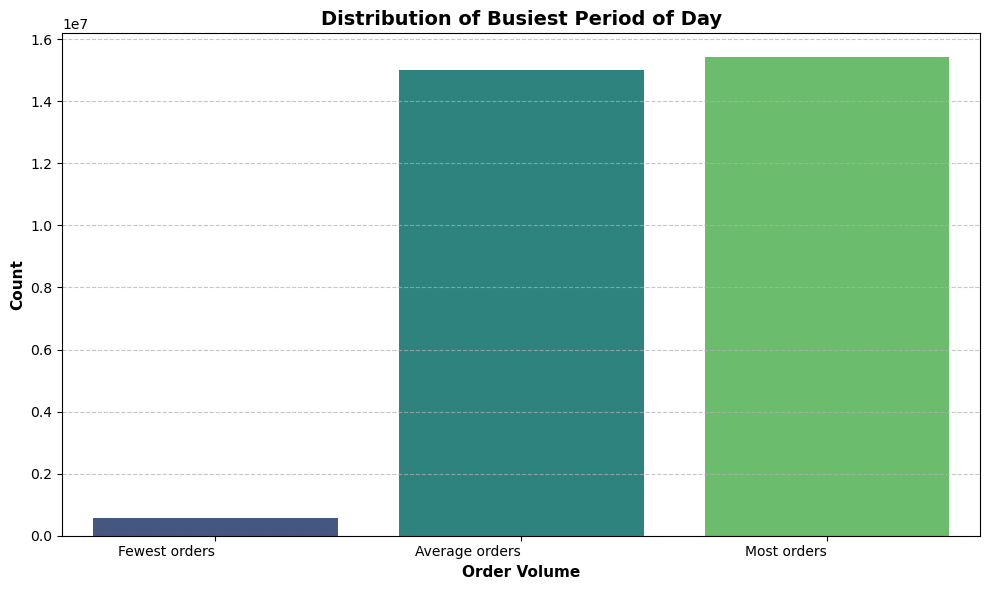

In [130]:
# Define the order for age groups from youngest to oldest
busiest_period_of_day_order = ['Fewest orders', 'Average orders', 'Most orders']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='busiest_period_of_day', palette='viridis', order=busiest_period_of_day_order)

# Adding titles and labels for clarity
plt.title('Distribution of Busiest Period of Day', fontsize=14, fontweight='bold')
plt.xlabel('Order Volume', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/busiest_period_of_day_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Spending Groups

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/2144007790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='spending_flag', palette='viridis', order=spending_flag_order)


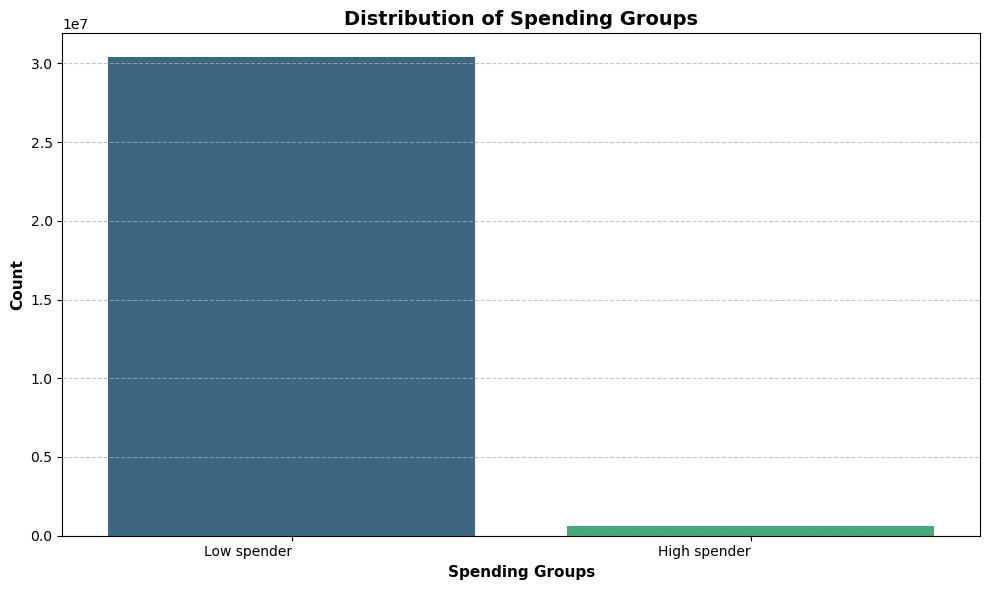

In [144]:
# Define the order for age groups from youngest to oldest
spending_flag_order = ['Low spender', 'High spender']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='spending_flag', palette='viridis', order=spending_flag_order)

# Adding titles and labels for clarity
plt.title('Distribution of Spending Groups', fontsize=14, fontweight='bold')
plt.xlabel('Spending Groups', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_groups_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Order Frequency Groups

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/2622838558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='order_frequency_flag', palette='viridis', order=order_frequency_flag_order)


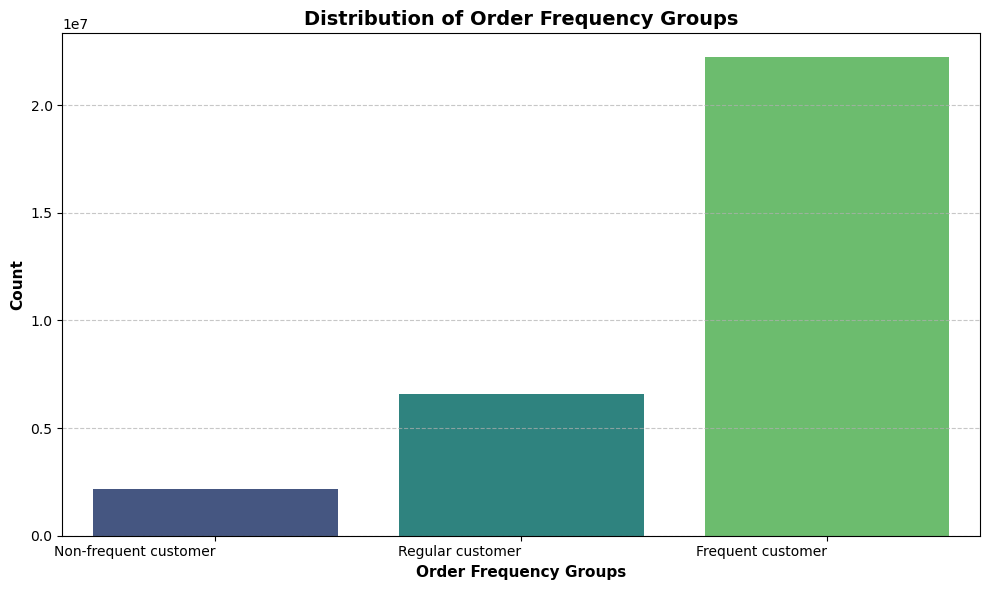

In [150]:
# Define the order for age groups from youngest to oldest
order_frequency_flag_order = ['Non-frequent customer', 'Regular customer', 'Frequent customer']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='order_frequency_flag', palette='viridis', order=order_frequency_flag_order)

# Adding titles and labels for clarity
plt.title('Distribution of Order Frequency Groups', fontsize=14, fontweight='bold')
plt.xlabel('Order Frequency Groups', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_frequency_flag_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Frequency of Regions

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/2159154154.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='region', palette='viridis', order=region_order)


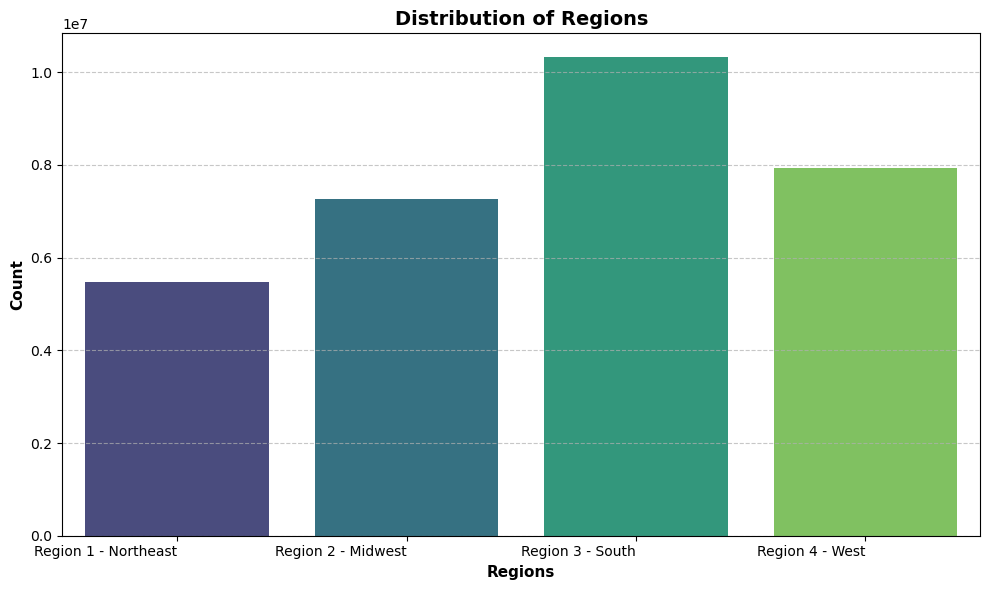

In [155]:
# Define the order for age groups from youngest to oldest
region_order = ['Region 1 - Northeast', 'Region 2 - Midwest', 'Region 3 - South', 'Region 4 - West']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='region', palette='viridis', order=region_order)

# Adding titles and labels for clarity
plt.title('Distribution of Regions', fontsize=14, fontweight='bold')
plt.xlabel('Regions', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/region_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Age Groups

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/4086895147.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='age_group', palette='viridis', order=age_group_order)


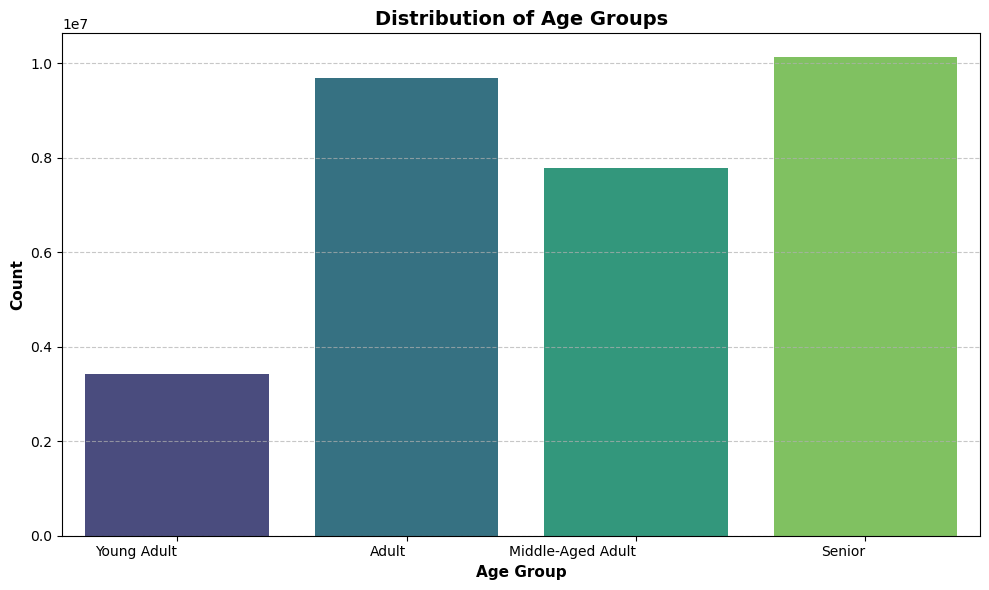

In [99]:
# Display the distribution of age_roup

import matplotlib.pyplot as plt
import seaborn as sns

# Define the order for age groups from youngest to oldest
age_group_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='age_group', palette='viridis', order=age_group_order)

# Adding titles and labels for clarity
plt.title('Distribution of Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/age_group_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Incomes

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/2353984611.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='income_group', palette='viridis', order=income_group_order)


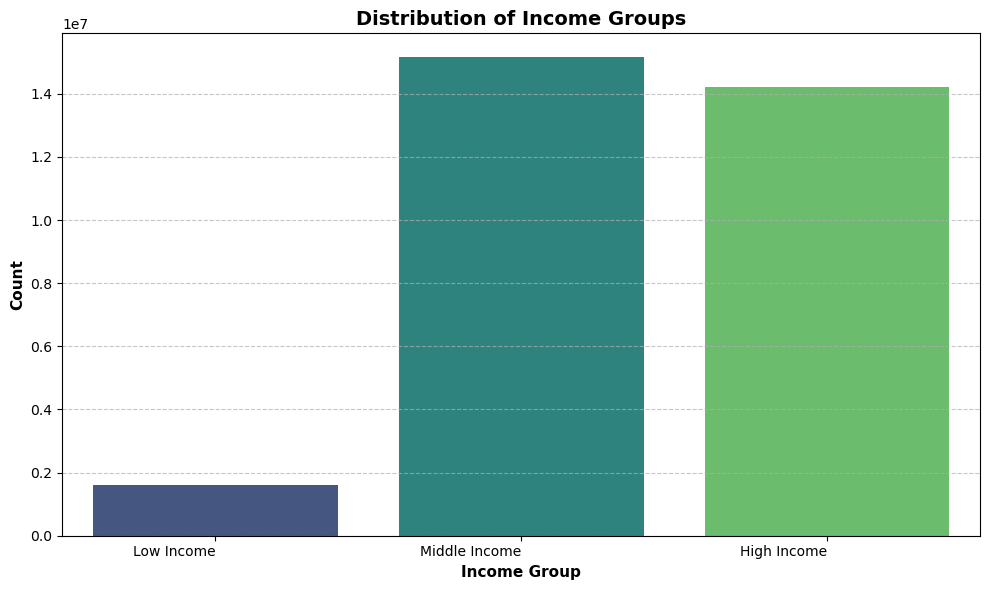

In [103]:
# Display the distribution of age_roup

import matplotlib.pyplot as plt
import seaborn as sns

# Define the order for groups from youngest to oldest
income_group_order = ['Low Income', 'Middle Income', 'High Income']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='income_group', palette='viridis', order=income_group_order)

# Adding titles and labels for clarity
plt.title('Distribution of Income Groups', fontsize=14, fontweight='bold')
plt.xlabel('Income Group', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/income_group_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Family Status

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/52708447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='family_status', palette='viridis', order=family_status_order)


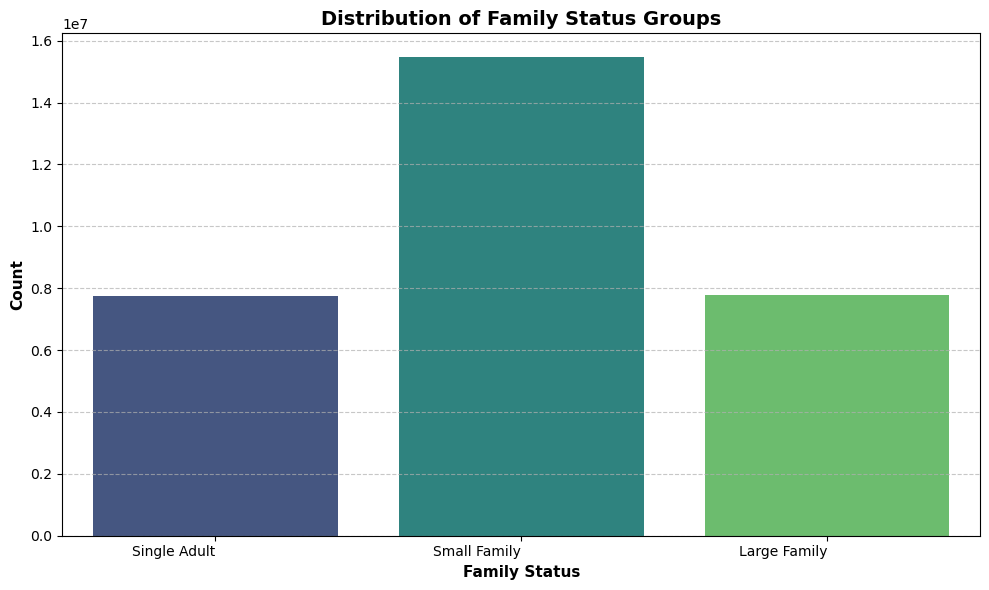

In [162]:
# Define the order for groups from youngest to oldest
family_status_order = ['Single Adult', 'Small Family', 'Large Family']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='family_status', palette='viridis', order=family_status_order)

# Adding titles and labels for clarity
plt.title('Distribution of Family Status Groups', fontsize=14, fontweight='bold')
plt.xlabel('Family Status', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/family_status_group_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Order Timing Week

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/917190145.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='order_timing_week', palette='viridis', order=order_timing_week_order)


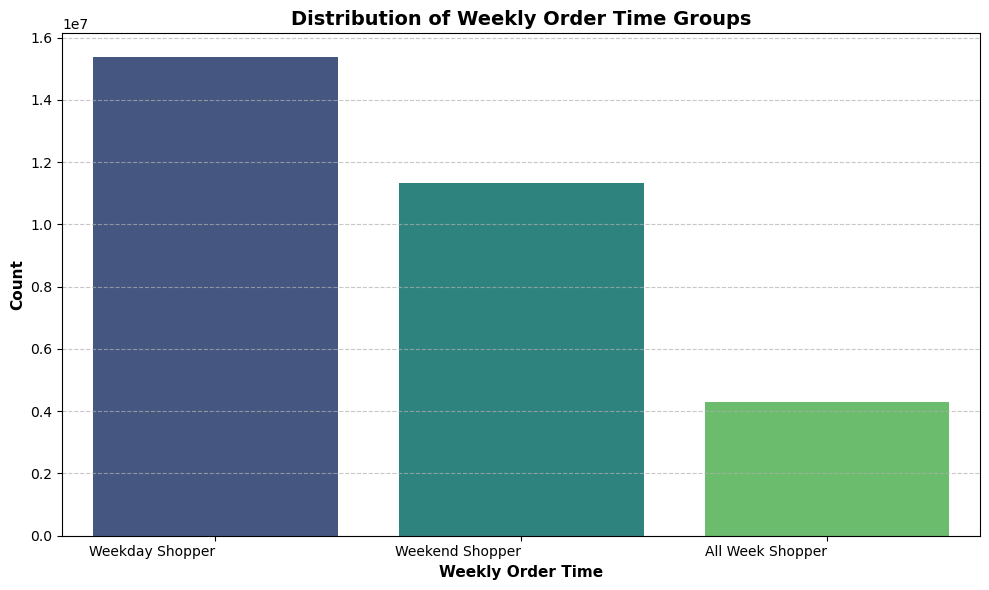

In [167]:
# Define the order for groups from youngest to oldest
order_timing_week_order = ['Weekday Shopper', 'Weekend Shopper', 'All Week Shopper']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='order_timing_week', palette='viridis', order=order_timing_week_order)

# Adding titles and labels for clarity
plt.title('Distribution of Weekly Order Time Groups', fontsize=14, fontweight='bold')
plt.xlabel('Weekly Order Time', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_time_week_group_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Order Timing Day

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/229214643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='order_timing_day', palette='viridis', order=order_timing_day_order)


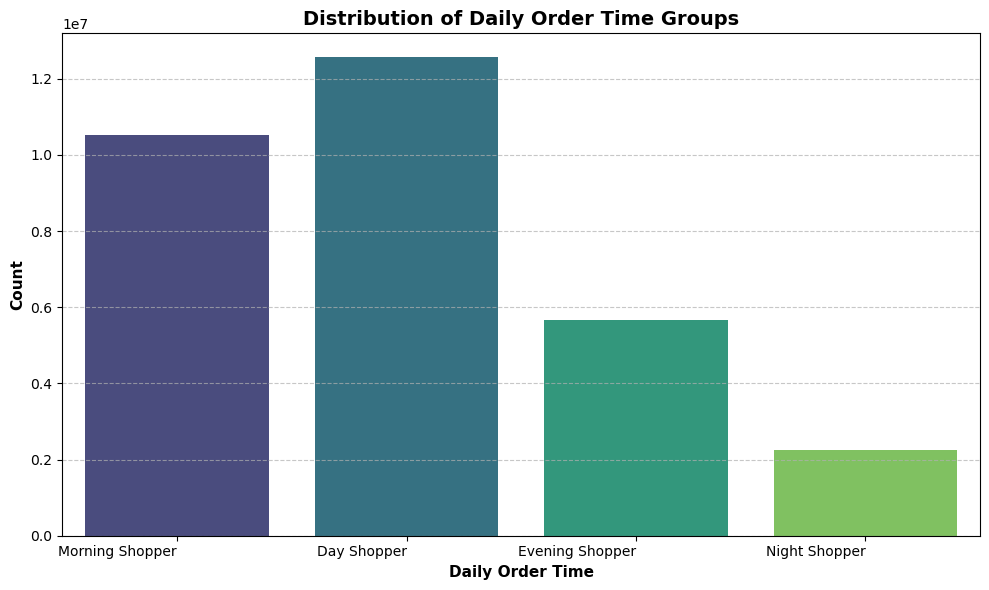

In [172]:
# Define the order for groups from youngest to oldest
order_timing_day_order = ['Morning Shopper', 'Day Shopper', 'Evening Shopper', 'Night Shopper']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='order_timing_day', palette='viridis', order=order_timing_day_order)

# Adding titles and labels for clarity
plt.title('Distribution of Daily Order Time Groups', fontsize=14, fontweight='bold')
plt.xlabel('Daily Order Time', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_time_day_group_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Distribution of Product Preference Groups

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/3844036217.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data, x='product_preference', palette='viridis', order=product_preference_order)


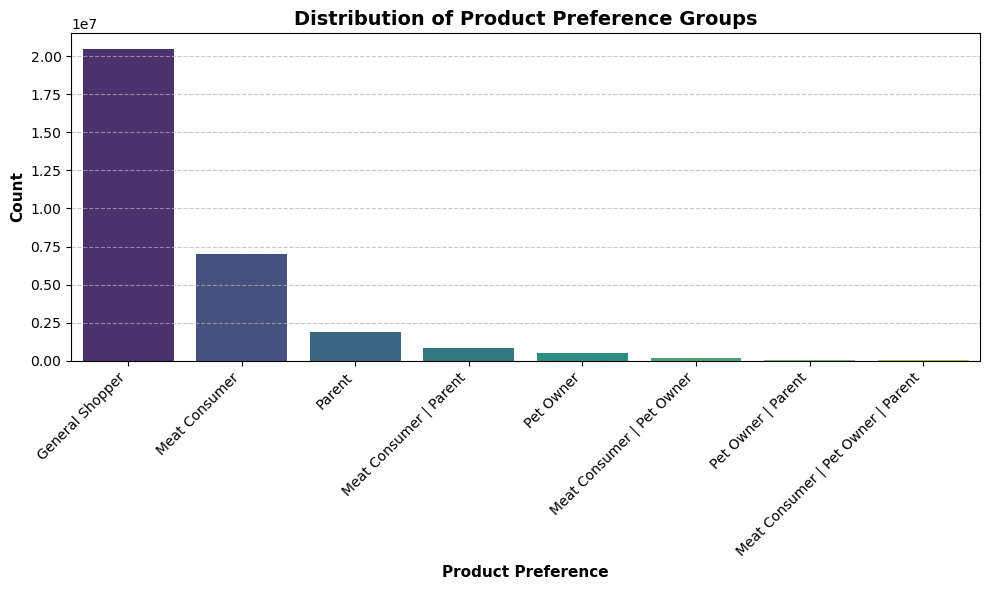

In [181]:
# Define the order for groups from youngest to oldest
product_preference_order = ['General Shopper', 'Meat Consumer', 'Parent', 'Meat Consumer | Parent', 'Pet Owner', 'Meat Consumer | Pet Owner', 'Pet Owner | Parent', 'Meat Consumer | Pet Owner | Parent']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data, x='product_preference', palette='viridis', order=product_preference_order)

# Adding titles and labels for clarity
plt.title('Distribution of Product Preference Groups', fontsize=14, fontweight='bold')
plt.xlabel('Product Preference', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/product_preference_group_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

#### Create Pet Owner Column

In [212]:
# Import cords_prods_deps_cust_profile.pkl
df_final_data_pet = pd.read_pickle(r'/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/02 - Data/Prepared Data/ords_prods_deps_cust_profile.pkl')

In [216]:
# Function to determine product preference based on department purchases per order

def categorize_pet_ownership(department_ids):
    preferences = []  

    if 8 in department_ids:   # Pets
        preferences.append('Pet Owner')

    # Assign multiple preferences if applicable
    return ' | '.join(preferences) if preferences else 'Non-Pet Owner'

# Group by order_id and collect all unique department_ids for each order
df_pet_owner = df_final_data_pet.groupby('order_id')['department_id'].agg(set).reset_index()

# Apply function to create the new column
df_pet_owner['pet_owner'] = df_pet_owner['department_id'].apply(categorize_pet_ownership)

# Drop the department_id column after applying the function
df_pet_owner.drop(columns=['department_id'], inplace=True)

# Merge back into the main dataset
df_final_data_pet = df_final_data_pet.merge(df_pet_owner, on='order_id', how='left')

# Display frequency distribution
print(df_final_data_pet['pet_owner'].value_counts(normalize=True) * 100)

pet_owner
Non-Pet Owner    97.522249
Pet Owner         2.477751
Name: proportion, dtype: float64


In [225]:
# Export the resulting data to a Pkl file
df_final_data_pet.to_pickle('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/02 - Data/Prepared Data/ords_prods_deps_cust_profile_pet.pkl')

#### Distribution of Pet Owners

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_58992/559866507.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_data_pet, x='pet_owner', palette='viridis', order=pet_owner_order)


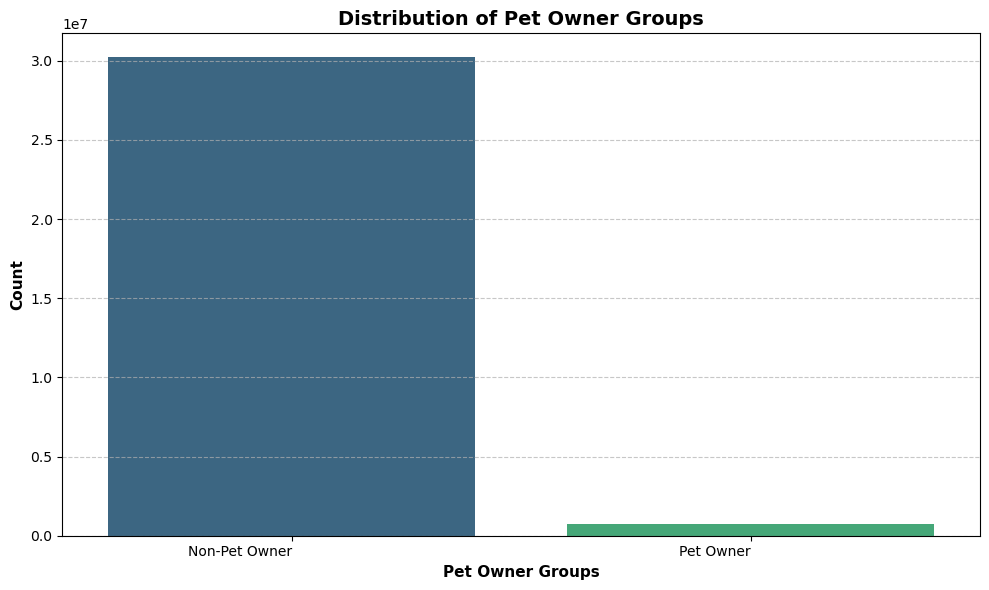

In [223]:
# Define the order for groups from youngest to oldest
pet_owner_order = ['Non-Pet Owner', 'Pet Owner']

# Plot the distribution of age groups
plt.figure(figsize=(10,6))

# Using a different color palette for better aesthetics
sns.countplot(data=df_final_data_pet, x='pet_owner', palette='viridis', order=pet_owner_order)

# Adding titles and labels for clarity
plt.title('Distribution of Pet Owner Groups', fontsize=14, fontweight='bold')
plt.xlabel('Pet Owner Groups', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=0, ha='right')

# Adding gridlines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/pet_owner_group_distribution.png', dpi=300)  # Saves with 300 dpi for high quality

# Display the plot
plt.show()

# 7. Further Frequency Calculations

In [227]:
#Frequency in %
price_range_percentages = df_final_data['max_order'].value_counts(normalize=True) * 100
print(price_range_percentages)

max_order
99    3.782256
8     2.622043
6     2.620078
9     2.616164
7     2.596460
        ...   
93    0.162745
90    0.156156
97    0.145096
98    0.143918
96    0.130576
Name: proportion, Length: 95, dtype: float64


In [187]:
# Calculate min, mean, and max for 'max_order'
max_order_stats = df_final_data['max_order'].agg(['min', 'mean', 'max'])

# Display the result
print(max_order_stats)

min      5.000000
mean    34.425634
max     99.000000
Name: max_order, dtype: float64


In [189]:
#Frequency in %
price_range_percentages = df_final_data['loyalty_flag'].value_counts(normalize=True) * 100
print(price_range_percentages)

loyalty_flag
Regular customer    51.273672
Loyal customer      33.213463
New customer        15.512865
Name: proportion, dtype: float64


In [191]:
#Frequency in %
price_range_percentages = df_final_data['spending_flag'].value_counts(normalize=True) * 100
print(price_range_percentages)

spending_flag
Low spender     98.049267
High spender     1.950733
Name: proportion, dtype: float64


In [195]:
#Frequency in %
price_range_percentages = df_final_data['order_frequency_flag'].value_counts(normalize=True) * 100
print(price_range_percentages)

order_frequency_flag
Frequent customer        71.715413
Regular customer         21.217195
Non-frequent customer     7.067392
Name: proportion, dtype: float64


In [197]:
#Frequency in %
price_range_percentages = df_final_data['high_activity_flag'].value_counts(normalize=True) * 100
print(price_range_percentages)

high_activity_flag
True    100.0
Name: proportion, dtype: float64


In [199]:
#Frequency in %
price_range_percentages = df_final_data['region'].value_counts(normalize=True) * 100
print(price_range_percentages)

region
Region 3 - South        33.299693
Region 4 - West         25.600984
Region 2 - Midwest      23.449765
Region 1 - Northeast    17.649557
Name: proportion, dtype: float64
